In [5]:
import matplotlib.pyplot as plt
import numpy as np
import edl
import plotting 
import constants as C
import langevin as L 

%matplotlib widget

Sweep from -1.07V to -1.67V. Maximum relative residual: 3.60946e-05.
Sweep from -1.07V to -1.07V. Maximum relative residual: 1.25228e-05.
Sweep from -1.07V to -1.67V. Maximum relative residual: 3.03839e-05.
Sweep from -1.07V to -1.07V. Maximum relative residual: 2.28430e-05.
Sweep from -1.07V to -1.67V. Maximum relative residual: 2.84607e-05.
Sweep from -1.07V to -1.07V. Maximum relative residual: 3.44596e-07.
Sweep from -1.07V to -1.67V. Maximum relative residual: 2.58028e-05.
Sweep from -1.07V to -1.07V. Maximum relative residual: 6.84324e-06.


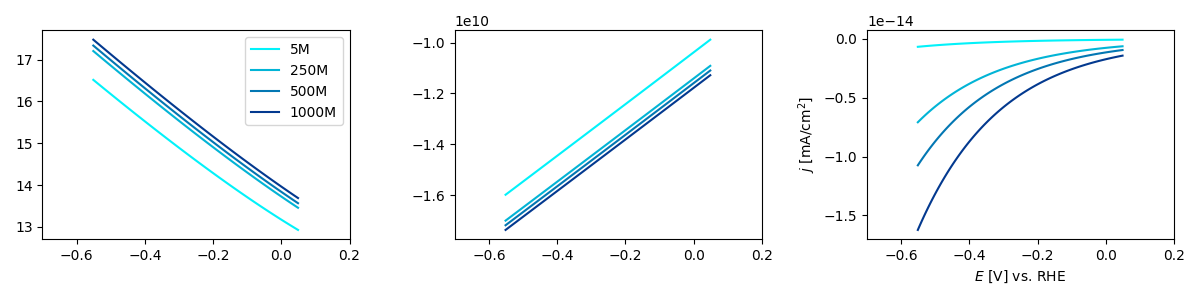

In [10]:
gamma = 1
p_h = 11
e_eq_she = -59e-3 * p_h 
e_pzc_she = 0.474
e_range_she = np.linspace(-1.2, -0.6, 100)
cat_conc_range = [5e-3, 250e-3, 500e-3, 1000e-3]

k=1e-7
f=C.E_0*C.BETA
mu=f*1e-10*0.01

red = np.linspace(3, 2, len(cat_conc_range))[::-1]
gre = np.linspace(57, 242, len(cat_conc_range))[::-1]
blu = np.linspace(143, 250, len(cat_conc_range))[::-1]

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), sharex=True)

for i, c_cat in enumerate(cat_conc_range): 
    model = edl.Abrashkin(c_cat, gamma, gamma)
    sol = model.sweep(e_range_she - e_pzc_she)

    rgb = (red[i]/255, gre[i]/255, blu[i]/255)

    ax[0].plot(sol.phi+e_pzc_she-e_eq_she, sol.c_surf['Cations'], label=f'{c_cat*1e3:.0f}M', color=rgb)
    ax[1].plot(sol.phi+e_pzc_she-e_eq_she, sol.efield, color=rgb)

    j = -k * np.exp(-f*(e_range_she-e_eq_she)/2) * np.exp(f*mu*sol.efield) * c_cat # sol.c_surf['Cations'] 
    ax[2].plot(e_range_she-e_eq_she, j, color=rgb)

ax[0].legend()
ax[0].set_xlim([-0.7, 0.2])
ax[2].set_xlabel(r'$E$ [V] vs. RHE')
ax[2].set_ylabel(r'$j$ [mA/cm$^2$]')
plt.tight_layout()


In [7]:
f

38.95535453749635